In [1]:
import sklearn.datasets as datasets
import pandas as pd
def get_iris_data_frame():
        iris_data = datasets.load_iris()
        df_data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
        type_dict = {i:t for i, t in enumerate(iris_data.target_names)}
        df_target = pd.DataFrame(iris_data.target, columns=['Type'])
        df_target.loc[:, 'Type'] = df_target['Type'].map(type_dict)
        df_iris = pd.concat([df_data, df_target], axis=1)
        return df_iris

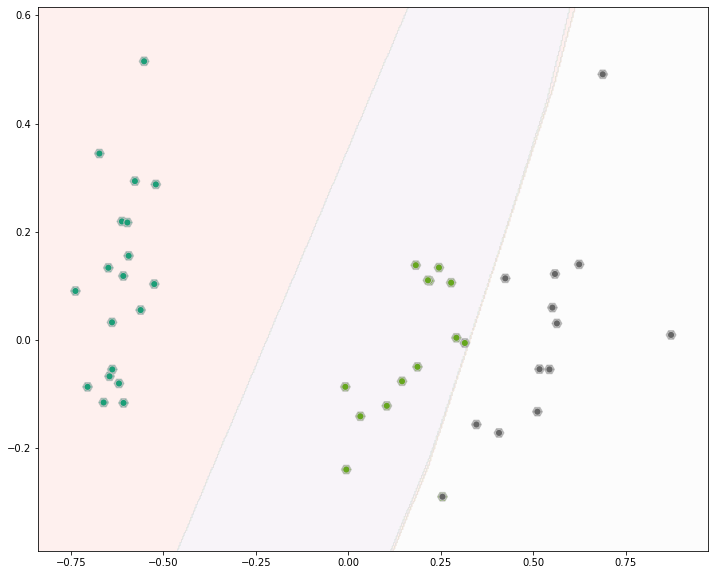

In [23]:
def plot_decision_boundary(model, X, y, y_predicted=None):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 500)
    vticks = np.linspace(bmin, bmax, 500)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    y_pred_enc = model.predict(ab)

    y_pred_enc = np.round(y_pred_enc)
    y_pred=np.array([np.argmax(y, axis=None, out=None) for y in y_pred_enc])
    Z = y_pred.reshape(aa.shape)

    fig = plt.figure(figsize=(12, 10))
    ax1 = fig.add_subplot(1, 1, 1)
    cntr1 = ax1.contourf(aa, bb, Z, cmap='Pastel1', alpha=0.2)
#    ax1.clabel(cntr1, inline=True, fontsize=10, use_clabeltext=True, colors='b')
    
    if y_predicted is not None:
        ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', ec='silver', marker='H', s=100, alpha=0.9)
        ax1.scatter(X[:, 0], X[:, 1], c=y_predicted, cmap='Dark2', ec='silver', marker='o', s=50)
    else:
        ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='Dark2', ec='silver', marker='H', s=100)
    return plt

plot_decision_boundary(model, X_test, y_test, y_pred).show()

2/2 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9556


Test loss: 0.04075563699007034 Test accuracy: 0.9555555582046509


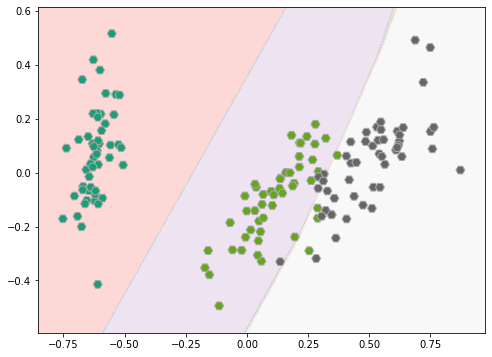

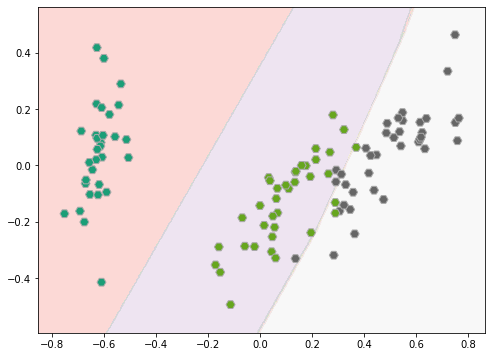

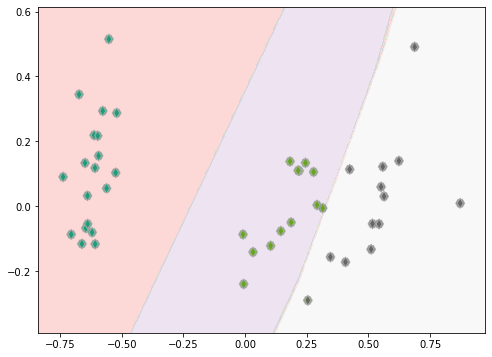

In [3]:
# multi-class classification with Keras
from sklearn.datasets import make_blobs, make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn import decomposition as decomp
from sklearn.preprocessing import LabelEncoder
# load dataset
dataframe = get_iris_data_frame()
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
y = dataset[:,4]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

X = MinMaxScaler().fit_transform(X)

if X.shape[1] > 2:
    X = decomp.PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size=0.3, random_state=42)

target_labels_count = np.unique(encoded_y).size
if target_labels_count > 1:
    y_train_enc = to_categorical(y_train)
    y_test_enc = to_categorical(y_test)
else:
    y_train_enc = y_train
    y_test_enc = y_test

#activation_f = 'softmax'
activation_f = 'sigmoid'
#activation_f = 'tanh'

#loss_f = 'categorical_crossentropy'
loss_f = 'binary_crossentropy'

model = Sequential()
model.add(Dense(9, activation='relu', input_dim=2))
model.add(Dense(7, activation='tanh'))
model.add(Dense(target_labels_count, activation=activation_f))

# Compile the model
#model.compile(optimizer='adam', loss=loss_f, metrics=['accuracy'])

from keras.optimizers import Adam
model.compile(Adam(learning_rate=0.05), loss_f, metrics=['accuracy'])

from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_accuracy', patience=500, mode='max')]
model.fit(X_train, y_train_enc, epochs=200, verbose=0, callbacks=my_callbacks, validation_data=(X_test, y_test_enc))
eval_result = model.evaluate(X_test, y_test_enc)
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

y_pred = model.predict(X_test)
y_pred_enc = np.round(y_pred)
y_pred=[np.argmax(y, axis=None, out=None) for y in y_pred_enc]

plot_decision_boundary(model, X, encoded_y).show()
plot_decision_boundary(model, X_train, y_train).show()
plot_decision_boundary(model, X_test, y_test, y_pred).show()
#plot_decision_boundary(model, X_test, y_pred).show()